In [35]:
# questo script analizza il caso b1=b2=inf in cui partiamo da dato iniz. a scalino 
# la X è supposta essere ora diversa da 0, le x sono ancora normali centrate in 0 ma con una loro varianza sigma_t,
# e vediamo a cosa converge a tempi lunghi di ord(1), se è un'altra funzione a gradino e come si sposta

# in un secondo momento le x devono essere prese anche non più centrate in 0, per simulare un passo infinitesimale
# della dinamica di ordine N^2

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import fsolve

In [36]:
# initialize all the parameters
b1 = 9
b2 = 9
alfa1 = 1
alfa2 = 1
alfa3 = 1
sigma = 1
Nspin = 10000
Niter = 500000
dt = 0.01  # così è ordine 1


la media iniziale è: -0.007


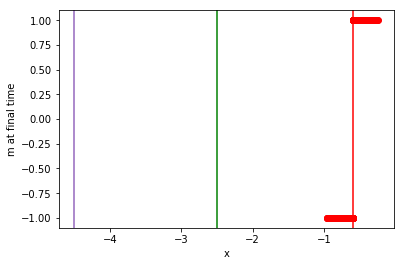

In [37]:
X = 2.5 #initialize the average of the diffusions
sigma = 0.1

Xprior = -0.6

x0 = -0.6
x = np.random.normal(Xprior,sigma,Nspin) 
#print(np.amax(x))
#print(np.amin(x))

########### dati a scalino
m = np.zeros(Nspin)
for i in range(0,Nspin):
    if x[i] > x0:
        m[i] = 1
    else: m[i] = -1
m0 = x0
    
m1 = np.repeat(m[0],Niter) #these will store 
m2 = np.repeat(m[1],Niter) #the first two magnetizations

M = np.repeat(np.mean(m),Niter)  #initialize the average of the magnetizations

print("la media iniziale è:", np.mean(m))

# find the new stable point xo(X), when x0 + X > 0
def f(y):
    return y - 2*norm.cdf(y-X,Xprior,sigma) + X


# find the new stable point xo(X), when x0 + X < 0
def g(y): 
    return y + 2*norm.cdf(-y+X,Xprior,sigma) +X


#print(np.mean(m))
#print(X)


plt.plot(x,m, 'ro')
plt.xlabel('x')
plt.ylabel('m at final time')
plt.axvline(m0, color='r')
plt.axvline(fsolve(f, x0), color='g')
plt.axvline(fsolve(g,x0), color ='C4')
plt.show()

# draw the new x_i's for the dynamics simulation: è necessario questo step o no?
#x = np.random.normal(X,1,Nspin) 


In [38]:
for i in range(0,Niter):
        M[i] = np.mean(m)  #update the running values
        m1[i] = m[0]
        m2[i] = m[1]
        #noise = np.random.normal(0,1,Nspin) # draw the updated noise vector 
        u1 = np.random.random_sample(Nspin) # draw N uniform samples to check the update rule 
        u2 = np.random.random_sample(Nspin)
        w1 = Nspin*((1 + m)/2)*(1-np.tanh(b1*(m + x) + b2*(M[i] + X)))*dt > u1  #accept the update rules with the right proba
        w2 = Nspin*((1 - m)/2)*(1+np.tanh(b1*(m + x) + b2*(M[i] + X)))*dt > u2
        m =  m - w1*(2./Nspin) + w2*(2./Nspin)   
        #x = x - (alfa2/Nspin)*(x-X)*dt + sigma/(Nspin**(1/2))*noise*(dt**(1/2))

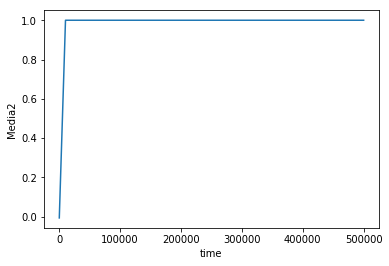

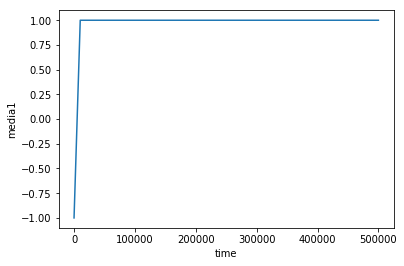

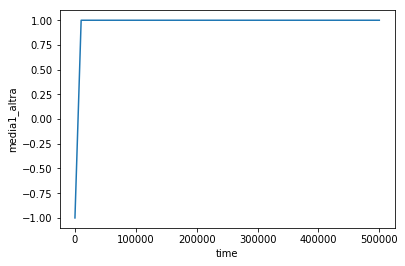

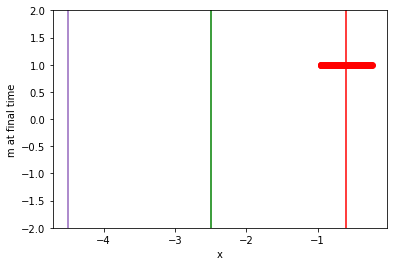

il valore previsto con l eq. per x0(X) quando x0 +X > 0: [0.99999943]
il valore previsto con l eq. per x0(X) quando x0 +X < 0: [1.]
l ultimo valore trovato al tempo finale per la M: 0.9999999999999222
il valore di x0(X) quando x0(X) + X > 0: [-2.5]
il valore di x0(X) quando x0(X) + X < 0: [-4.5]


In [39]:
plt.plot(M)
plt.xlabel('time')
plt.ylabel('Media2')
plt.show() 

plt.plot(m1)
plt.xlabel('time')
plt.ylabel('media1')
plt.show() 

plt.plot(m2)
plt.xlabel('time')
plt.ylabel('media1_altra')
plt.show() 

plt.plot(x,m,'ro')
plt.xlabel('x')
plt.axvline(m0, color='r')
plt.ylabel('m at final time')
plt.axvline(fsolve(f, x0), color='g')
plt.axvline(fsolve(g,x0), color ='C4')
plt.ylim(-2,2)
plt.show()


MX = 1- 2*norm.cdf(fsolve(f, x0),X) # + norm.cdf(-fsolve(f, x0),X)
MGX = 1 - 2*norm.cdf(fsolve(g, x0),X) # + norm.cdf(-fsolve(g, x0),X)

print('il valore previsto con l eq. per x0(X) quando x0 +X > 0:', MX)
print('il valore previsto con l eq. per x0(X) quando x0 +X < 0:',MGX)

print('l ultimo valore trovato al tempo finale per la M:', M[Niter-1])

print('il valore di x0(X) quando x0(X) + X > 0:', fsolve(f,x0))
print('il valore di x0(X) quando x0(X) + X < 0:', fsolve(g,x0))



#M_ord1 = norm.cdf(2/3) - norm.cdf(-2/3)
#print('il valore teorico di M previsto ad ordine 1 partendo da dati costanti', M_ord1)

# confronta questo punto con l'equazione che abbiamo trovato noi

# e fallo anche per valori iniziali di m non centrati in 0, per studiare la dipendenza 
# dal punto iniziale